## Regularized logistic regression


Bir üretim tesisinden gelen mikroçiplerin kalite güvencesinden (QA) geçip geçmediğini tahmin etmek için Regularization lojistik regresyon uygulayacağız.


In [342]:
df=pd.read_csv("ex2data2.txt",header=None)

In [343]:
X=df.iloc[:,:2]

In [344]:
y=df.iloc[:,2]

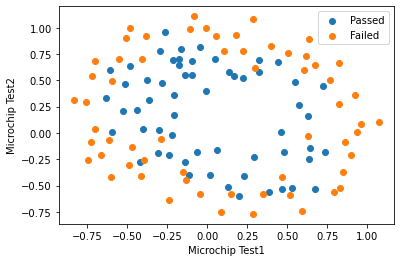

In [345]:
mask = y == 1
passed = plt.scatter(X[mask][0].values, X[mask][1].values)
failed = plt.scatter(X[~mask][0].values, X[~mask][1].values)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

##### ->Yukarıdaki şekilde görüldüğü gibi, veri setimizin düz bir çizgi ile pozitif ve negatif örneklere ayrılamayacağını göstermektedir. Bu nedenle veriye daha iyi uymaya çalışmak için ek polinom terimleri eklediğimiz feature mapping i uygularız.

### -Feature Mapping-

##### ->Verilere daha iyi uymanın bir yolu, her veri noktasından daha fazla özellik oluşturmaktır. Bu nedenle, özellikleri x1 ve x2'nin altıncı kuvvetine kadar tüm polinom terimleriyle eşleştireceğiz.

### 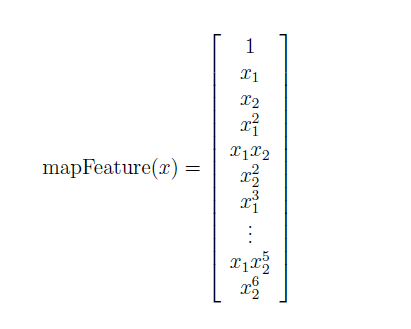

##### ->Feature Mapping sonucunda verimiz daha anlamlı bir sınıflandırıcı oluşturmamıza izin verirken, aynı zamanda aşırı uydurmaya daha yatkındır. 

In [346]:
def map_feature(X1,X2):
    degree=6
    out=np.ones(len(X1))
    out=out.reshape(len(out),1)
    for i in range(1,degree+1):
        for j in range(i+1):
            hes=X1.pow(i-j)*(X2.pow(j))
            hes=hes.values.reshape(len(hes),1)
            out = np.append(out, hes, axis=1)
    return out

In [347]:
X1=X.iloc[:,0]
X2=X.iloc[:,1]

In [348]:
X=map_feature(X1,X2)

In [349]:
def sigmoid(x):
        z=np.exp(-x)
        sig=1/(1+z)
        return sig 

In [350]:
initial_theta=np.zeros((X.shape[1],1))

In [351]:
y=y.values.reshape(len(y),1)

### Cost Function

### 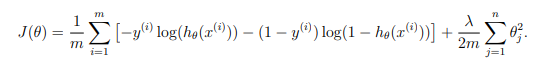

In [352]:
def cost_function_lr(theta,X,y,lambdav):
    m=len(y)
    J=0
    h=np.dot(X,theta)
    RT=(lambdav/(2*m))*(sum(pow(theta[1:],2)))
    J=(-1/(m))*((np.dot(y.transpose(),np.log(sigmoid(h)))+(np.dot((1-y).transpose(),np.log(1-sigmoid(h))))))+RT
    return J

### Gradient Descent 

### 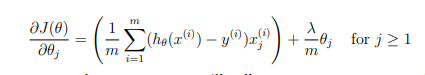

In [353]:
lambdav=1
cost_function_lr(initial_theta,X,y,lambdav)

array([[0.69314718]])

In [354]:
def gradient_descent_lr(theta,X,y,lambdav):  
    m=len(y)
    #print(X)
    #print(theta)
    h=np.dot(X,theta)
    grad=np.zeros((len(theta),1))
    grad[0]=(1/m)*(np.dot(X[:,0].transpose(),(sigmoid(h)-y)))
    grad[1:]=(1/m)*((np.dot(X[:,1:].transpose(),(sigmoid(h)-y)))+((lambdav*theta[1:])/m))
    return grad

#### Accuracy

In [355]:
optimal_theta=gradient_descent_lr(initial_theta,X,y,lambdav)

In [356]:
p=sigmoid(np.dot(X,optimal_theta))>=0.5

In [357]:
np.mean(p==y)*100

49.152542372881356

### ->Scipy ile Optimal thetaların bulunması


In [358]:
def lrGradientDescent(theta, X, y, lambda_t):
    m = len(y)
    grad = np.zeros([m,1])
    grad = (1/m) * X.T @ (sigmoid(X @ theta) - y)
    grad[1:] = grad[1:] + (lambda_t / m) * theta[1:]
    return grad

In [359]:
(m, n) = X.shape
y = y[:, np.newaxis]
theta = np.zeros((n,1))
lmbda = 1
J = cost_function_lr(theta, X, y, lmbda)
print(J)

[[[0.69314718]]]


In [360]:
output = opt.fmin_tnc(func = cost_function_lr, x0 = theta.flatten(), fprime = lrGradientDescent, \
                         args = (X, y.flatten(), lmbda))
theta = output[0]
print(theta)

[ 1.27271027  0.62529965  1.18111686 -2.01987399 -0.9174319  -1.43166925
  0.12393227 -0.36553117 -0.35725402 -0.17516291 -1.4581701  -0.05098417
 -0.61558548 -0.27469165 -1.19271297 -0.2421784  -0.20603293 -0.04466178
 -0.27778955 -0.29539513 -0.45645982 -1.04319155  0.02779373 -0.29244875
  0.01555762 -0.32742407 -0.1438915  -0.92467487]


In [361]:
#ACCURACY
pred = [sigmoid(np.dot(X, theta)) >= 0.5]
np.mean(pred == y.flatten()) * 100

83.05084745762711

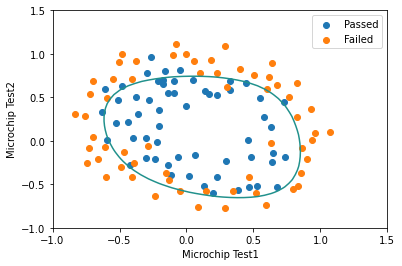

In [362]:
 u= np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
def mapFeatureForPlotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta)
mask = y.flatten() == 1
X = df.iloc[:,:-1]
passed = plt.scatter(X[mask][0], X[mask][1])
failed = plt.scatter(X[~mask][0], X[~mask][1])
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()